# Importing Libraries

In [0]:
from matplotlib import pyplot as plt
import numpy as np
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction import text
import nltk
from nltk import pos_tag
from sklearn.feature_extraction.text import TfidfTransformer
from nltk.corpus import stopwords
import random 
random.seed(42)
import sklearn.cluster as clst
from sklearn.cluster import KMeans as KM
import time
from sklearn import metrics

# Data Loading

In [0]:
twenty_train = fetch_20newsgroups(subset='train', categories=None, shuffle=True, random_state=42)
twenty_test = fetch_20newsgroups(subset='test', categories=None, shuffle=True, random_state=42)
print(twenty_train.keys())

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])


In [0]:
number_training_documents=len(twenty_train.filenames)
print('Number of training documents is : ',number_training_documents)
number_test_documents=len(twenty_test.filenames)
print('Number of test documents is : ',number_test_documents)
number_categories=len(twenty_test.target_names)
print('Number of categories is : ',number_categories)

Number of training documents is :  11314
Number of test documents is :  7532
Number of categories is :  20


In [0]:
categories = ['comp.sys.ibm.pc.hardware', 'comp.graphics', 'comp.sys.mac.hardware', 'comp.os.ms-windows.misc', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey']
train_dataset = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42)
test_dataset = fetch_20newsgroups(subset='test', categories=categories, shuffle=True, random_state=42)

In [0]:
number_training_documents=len(twenty_train.filenames)
print('Number of training documents is : ',number_training_documents)
number_test_documents=len(twenty_test.filenames)
print('Number of test documents is : ',number_test_documents)
number_categories=len(twenty_test.target_names)
print('Number of categories is : ',number_categories)

Number of training documents is :  11314
Number of test documents is :  7532
Number of categories is :  20


In [0]:
# Labels Binarization 
y_train_binary = train_dataset.target > 3
y_train_binary = y_train_binary.astype(int)
print(np.unique(y_train_binary))

[0 1]


# Question 1

In [0]:
vectorizer = CountVectorizer(min_df=3, stop_words='english')

X_train = vectorizer.fit_transform(train_dataset.data)
#Y_test = vectorizer.transform(test_dataset.data)

tfidf_transformer = TfidfTransformer()

X_train_tfidf = tfidf_transformer.fit_transform(X_train)
#Y_test_tfidf = tfidf_transformer.transform(Y_test)

print(X_train_tfidf.shape)
#print(Y_test_tfidf.shape)

(7882, 27768)


# Question 2

## The below takes a long time to run!

In [0]:
km = KM(n_clusters =2, random_state=0, max_iter = 1000, n_init = 30, n_jobs=-1)
print("Clustering sparse data with k_means")
km.fit(X_train_tfidf)
print("Training Finished")

Clustering sparse data with k_means
Training Finished


In [0]:
print("Contingency Matrix:" )
print(metrics.cluster.contingency_matrix(y_train_binary, km.labels_))

Contingency Matrix:
[[   4 3899]
 [1718 2261]]


# Question 3

In [0]:
print("Homogeneity: %0.3f" % metrics.homogeneity_score(y_train_binary, km.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(y_train_binary, km.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(y_train_binary, km.labels_))
print("Adjusted Rand-Index: %.3f" % metrics.adjusted_rand_score(y_train_binary, km.labels_))
print("Adjusted mutual info score: %0.3f" % metrics.adjusted_mutual_info_score(y_train_binary, km.labels_))
print()

Homogeneity: 0.254
Completeness: 0.335
V-measure: 0.289
Adjusted Rand-Index: 0.181
Adjusted mutual info score: 0.254



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


# Question 4

In [0]:
from sklearn.decomposition import TruncatedSVD
explained_variances_list=[]

#ref_varience = np.var(X_train_tfidf, axis=0).sum()    

#svd = TruncatedSVD(n_components=10000, random_state=42) 
#X_train_reduced_ref = svd.fit_transform(X_train_tfidf)
#ref_varience = np.var(X_train_reduced_ref, axis=0).sum()    

    
r=np.arange(3000)
#for i in r:
svd = TruncatedSVD(n_components=3000, random_state=42) 

X_train_reduced = svd.fit_transform(X_train_tfidf)
    #Y_test_reduced = svd.transform(Y_test_tfidf)

print(X_train_reduced.shape)
    #print(Y_test_reduced.shape)

   # explained_variances = np.var(X_train_reduced, axis=0)/ref_varience
#explained_variances_list.append(np.sum(svd.explained_variance_ratio_))
aa=svd.explained_variance_ratio_

(7882, 3000)


In [0]:
explained_variances_list=[]

for i in r: 
    suma=np.sum(aa[0:i])
    explained_variances_list.append(suma)
    

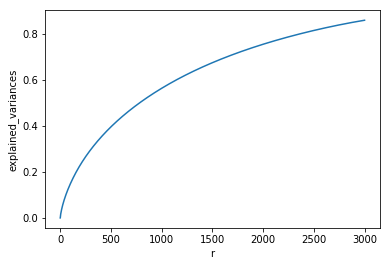

In [0]:
#plt.plot(explained_variance)
plt.plot(r,explained_variances_list)
plt.xlabel('r') 
plt.ylabel('explained_variances') 
plt.show()

# Question 5

In [0]:
# Get NMF reduction
from sklearn.decomposition import NMF
nmf = NMF(n_components=300, random_state=42)

W_train = nmf.fit_transform(X_train_tfidf) #Find our W and H from the train data
#W_test  = nmf.transform(X_test_tfidf) #apply the found H and do the minimization

H = nmf.components_

print('NMF reduced (W) training set shape: ', W_train.shape)
print('NMF reduced (H) set shape:          ', H.shape)

NMF reduced (W) training set shape:  (7882, 300)
NMF reduced (H) set shape:           (300, 27768)


In [0]:
#ONLY RUN TO UNPICKLE
#will give access to the models created below without actually running loop running
rs=[1,2]#,3,5,10,20,50,100,300]
for r in rs:
    fid=open('svd_'+str(r)+'.sav','rb')
    pickle.load(fid)
    fid=open('nmf_'+str(r)+'.sav','rb')
    pickle.load(fid)

FileNotFoundError: [Errno 2] No such file or directory: 'svd1.sav'

In [0]:
#THIS CODE RUNS FOREVER
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import pickle
import time
import warnings; warnings.simplefilter('ignore')
rs=[1,2,3,5,10,20,50,100,300]

pipe1_res=[]
pipe2_res=[]
pipe1_met_cont=[]
pipe1_met_homo=[]
pipe1_met_v=[]
pipe1_met_rand=[]
pipe1_met_mut=[]
pipe2_met_cont=[]
pipe2_met_homo=[]
pipe2_met_v=[]
pipe2_met_rand=[]
pipe2_met_mut=[]

#fid=open('model_dump.p','wb')

for r in rs:
    print('Running r=', r)
    print('-------------------------------')
    start = time.time()
    print('    Pipe 1 in progress.....')
    svd1=TruncatedSVD(n_components=r, random_state=42)
    X_train_small1=svd1.fit_transform(X_train_tfidf)
    km1=KM(n_clusters =2, random_state=0, max_iter = 1000, n_init = 30, n_jobs=-1)
    
    x=km1.fit(X_train_small1)
    pipe1_res.append(x)
    fid=open('svd_'+str(r)+'.sav','wb')
    pickle.dump(km1,fid)
    fid.close()
    pipe1_met_cont.append(metrics.cluster.contingency_matrix(y_train_binary, km1.labels_))
    pipe1_met_homo.append(metrics.completeness_score(y_train_binary, km1.labels_))
    pipe1_met_v.append(metrics.v_measure_score(y_train_binary, km1.labels_))
    pipe1_met_rand.append(metrics.adjusted_rand_score(y_train_binary, km1.labels_))
    pipe1_met_mut.append(metrics.adjusted_mutual_info_score(y_train_binary, km1.labels_))
    end = time.time()
    print('    Pipe 1 completed in ', end-start,' seconds.')
    print('           V-measure  = ',metrics.cluster.v_measure_score(y_train_binary, km1.labels_))
    print('           Rand index = ',metrics.cluster.adjusted_rand_score(y_train_binary, km1.labels_))
    print()
                          
    start = time.time()
    print('    Pipe 2 in progress.....')
    nmf1=NMF(n_components=r, random_state=42)
    X_train_small2=nmf1.fit_transform(X_train_tfidf)
    km2=KM(n_clusters =2, random_state=0, max_iter = 1000, n_init = 30, n_jobs=-1)
    
    y=km2.fit(X_train_small2)
    pipe2_res.append(y)
    fid=open('nmf_'+str(r)+'.sav','wb')
    pickle.dump(km2,fid)
    fid.close()
    pipe2_met_cont.append(metrics.cluster.contingency_matrix(y_train_binary, km2.labels_))
    pipe2_met_homo.append(metrics.completeness_score(y_train_binary, km2.labels_))
    pipe2_met_v.append(metrics.v_measure_score(y_train_binary, km2.labels_))
    pipe2_met_rand.append(metrics.adjusted_rand_score(y_train_binary, km2.labels_))
    pipe2_met_mut.append(metrics.adjusted_mutual_info_score(y_train_binary, km2.labels_))
    end = time.time()
    print('    Pipe 2 completed in ', end-start,' seconds.')
    print('           V-measure  = ',metrics.cluster.v_measure_score(y_train_binary, km2.labels_))
    print('           Rand index = ',metrics.cluster.adjusted_rand_score(y_train_binary, km2.labels_))
    print('-------------------------------')



Running r= 1
-------------------------------
    Pipe 1 in progress.....
    Pipe 1 completed in  0.531574010848999  seconds.
           V-measure  =  0.00029492122900643043
           Rand index =  0.0003281607588681464

    Pipe 2 in progress.....
    Pipe 2 completed in  0.4777209758758545  seconds.
           V-measure  =  0.0003025194525487269
           Rand index =  0.00033904080274629444
-------------------------------
Running r= 2
-------------------------------
    Pipe 1 in progress.....
    Pipe 1 completed in  0.6552824974060059  seconds.
           V-measure  =  0.5988288322205055
           Rand index =  0.7015437319941075

    Pipe 2 in progress.....
    Pipe 2 completed in  1.3114542961120605  seconds.
           V-measure  =  0.6795895510492934
           Rand index =  0.7770177788377391
-------------------------------
Running r= 3
-------------------------------
    Pipe 1 in progress.....
    Pipe 1 completed in  0.7450051307678223  seconds.
           V-measure  = 

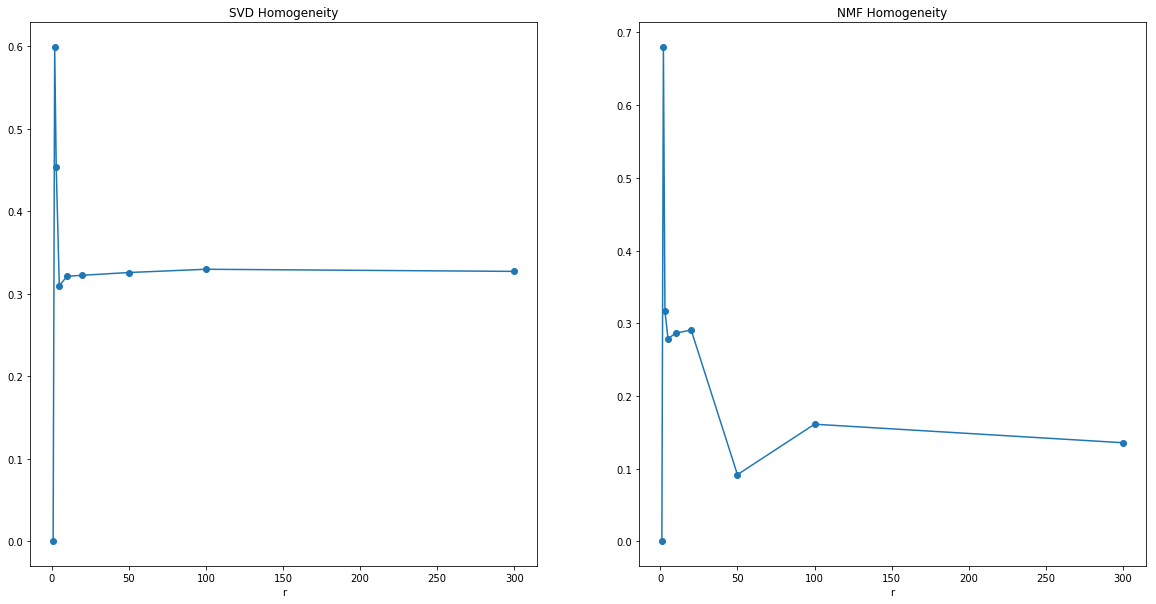

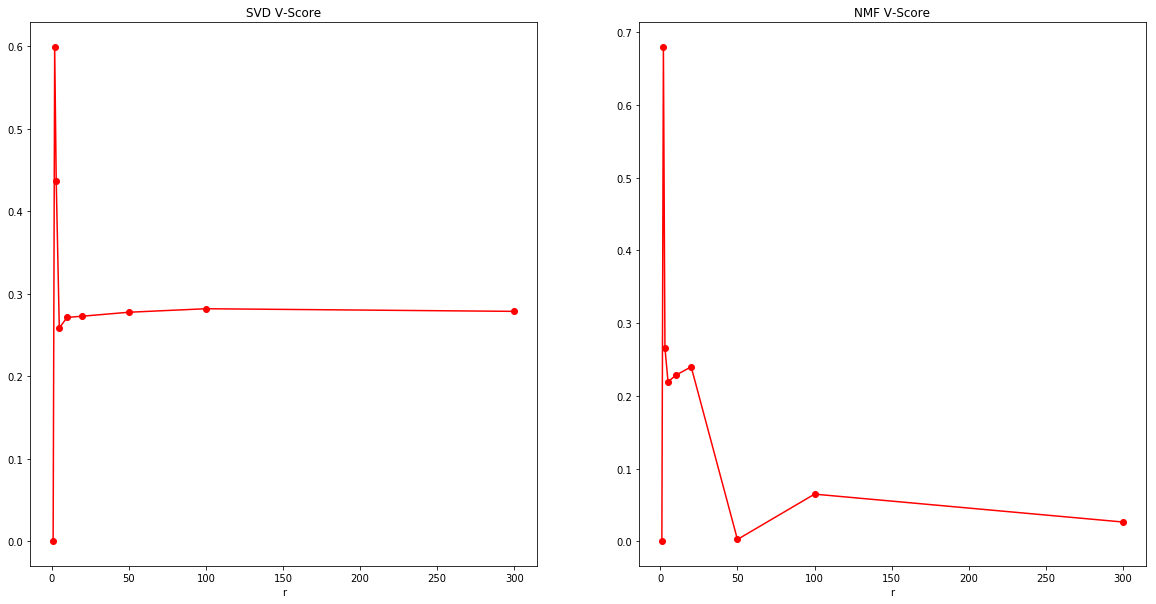

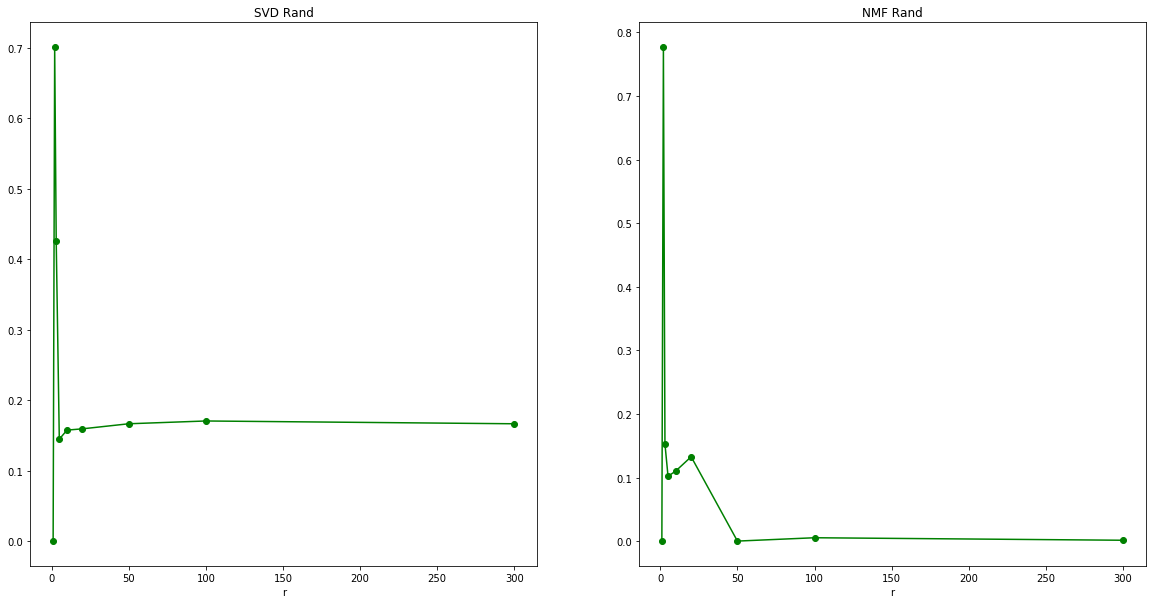

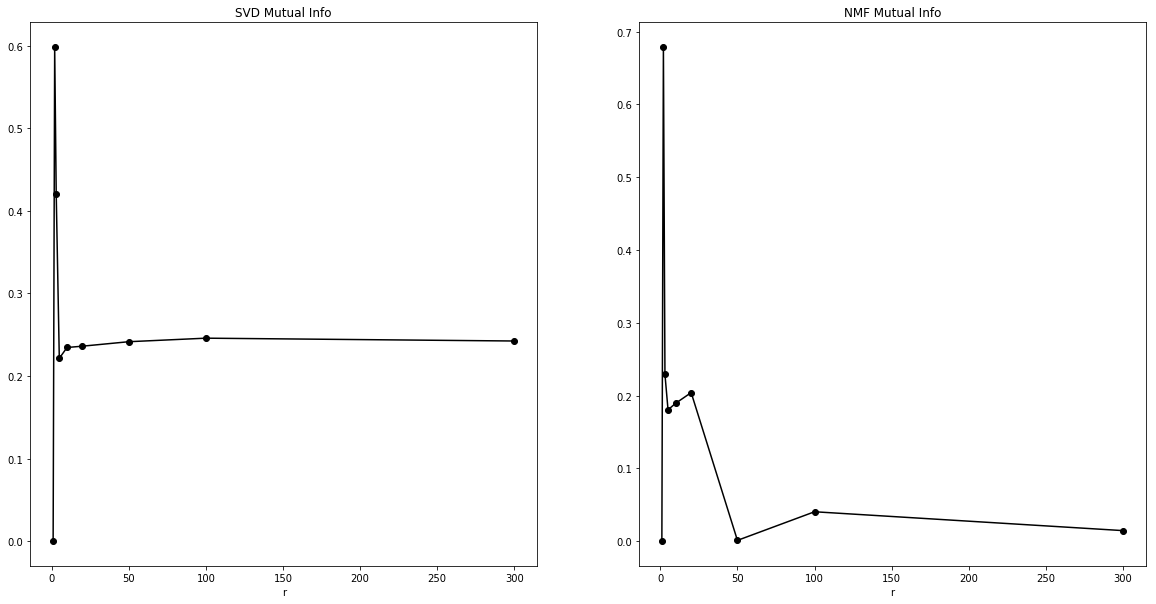

In [0]:
import matplotlib.pyplot as plt


plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.plot(rs,pipe1_met_homo,'o-')
plt.xlabel('r')
plt.title('SVD Homogeneity')

plt.subplot(1,2,2)
plt.plot(rs,pipe2_met_homo,'o-')
plt.xlabel('r')
plt.title('NMF Homogeneity')
plt.show()

plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.plot(rs,pipe1_met_v,'ro-')
plt.xlabel('r')
plt.title('SVD V-Score')

plt.subplot(1,2,2)
plt.plot(rs,pipe2_met_v,'ro-')
plt.xlabel('r')
plt.title('NMF V-Score')
plt.show()

plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.plot(rs,pipe1_met_rand,'go-')
plt.xlabel('r')
plt.title('SVD Rand')

plt.subplot(1,2,2)
plt.plot(rs,pipe2_met_rand,'go-')
plt.xlabel('r')
plt.title('NMF Rand')
plt.show()

plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.plot(rs,pipe1_met_mut,'ko-')
plt.xlabel('r')
plt.title('SVD Mutual Info')

plt.subplot(1,2,2)
plt.plot(rs,pipe2_met_mut,'ko-')
plt.xlabel('r')
plt.title('NMF Mutual Info')
plt.show()

# Aside : Test functions code

X_proj=np.array([[1,2,3,1],[4,5,6,7],[8,8,4,9]])
print('rank : ', np.linalg.matrix_rank(X_proj))
svd = TruncatedSVD(n_components=3, random_state=42) 
X_reduced = svd.fit_transform(X_proj)
print(np.var(X_reduced, axis=0)/ np.var(X_proj, axis=0).sum())
print(svd.explained_variance_ratio_)
print(np.sum(svd.explained_variance_ratio_))

##Question 7
####7.a

In [0]:
zeros= np.zeros(7882)

svd_r2 = TruncatedSVD(n_components=2, random_state=42)
X_train1_q7=svd_r2.fit_transform(X_train_tfidf)
X1_q7=km.fit(X_train1_q7)  
y1_q7_kmeans = km.predict(X_train1_q7)

In [0]:
X_train1_q7.shape

(7882, 2)

Text(0.5, 1.0, 'SVD ground truth label plot')

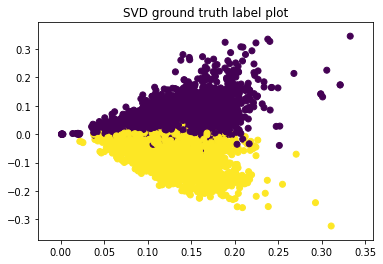

In [0]:
#SVD ground truth label plot
plt.scatter(X_train1_q7[:, 0], X_train1_q7[:, 1], c=y_train_binary)
plt.title('SVD ground truth label plot')

Text(0.5, 1.0, 'SVD clustering label plot')

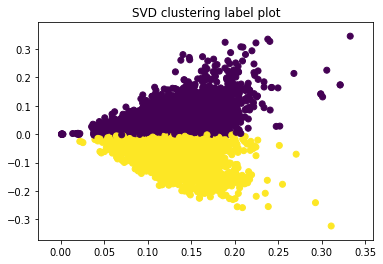

In [0]:
#SVD clustering label plot
plt.scatter(X_train1_q7[:, 0], X_train1_q7[:, 1], c=y1_q7_kmeans)
plt.title('SVD clustering label plot')

In [0]:
nmf_r2 = NMF(n_components=2, random_state=42)
X_train2_q7=nmf_r2.fit_transform(X_train_tfidf)
X2_q7=km.fit(X_train2_q7)  
y2_q7_kmeans = km.predict(X_train2_q7)

Text(0.5, 1.0, 'SVD ground truth label plot')

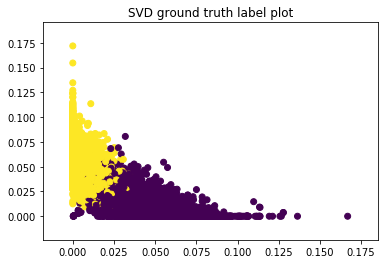

In [0]:
#NMF ground truth label plot
plt.scatter(X_train2_q7[:, 0], X_train2_q7[:, 1], c=y_train_binary)
plt.title('NMF ground truth label plot')

Text(0.5, 1.0, 'NMF clustering label plot')

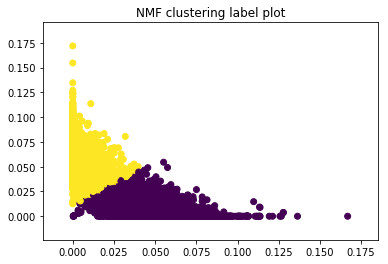

In [0]:
#NMF clustering label plot
plt.scatter(X_train2_q7[:, 0], X_train2_q7[:, 1], c=y2_q7_kmeans)
plt.title('NMF clustering label plot')

In [0]:
####7.b

In [0]:
from sklearn import preprocessing
#Scaling variacnce
X1_scaled_var = preprocessing.scale(X_train1_q7)
X1_q7_var=km.fit(X1_scaled_var)  
print("Variance Training for SVD")
print("Homogeneity: %0.3f" % metrics.homogeneity_score(y_train_binary, km.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(y_train_binary, km.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(y_train_binary, km.labels_))
print("Adjusted Rand-Index: %.3f" % metrics.adjusted_rand_score(y_train_binary, km.labels_))
print("Adjusted mutual info score: %0.3f" % metrics.adjusted_mutual_info_score(y_train_binary, km.labels_))

Variance Training for SVD
Homogeneity: 0.235
Completeness: 0.263
V-measure: 0.248
Adjusted Rand-Index: 0.255
Adjusted mutual info score: 0.235


In [0]:
X2_scaled_var = preprocessing.scale(X_train2_q7)
X2_q7_var=km.fit(X2_scaled_var)  
print("Variance Training for NMF")
print("Homogeneity: %0.3f" % metrics.homogeneity_score(y_train_binary, km.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(y_train_binary, km.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(y_train_binary, km.labels_))
print("Adjusted Rand-Index: %.3f" % metrics.adjusted_rand_score(y_train_binary, km.labels_))
print("Adjusted mutual info score: %0.3f" % metrics.adjusted_mutual_info_score(y_train_binary, km.labels_))

Variance Training for NMF
Homogeneity: 0.683
Completeness: 0.686
V-measure: 0.684
Adjusted Rand-Index: 0.773
Adjusted mutual info score: 0.683


In [0]:
c=0.01
X1_scaled_log = np.multiply(np.sign(X_train1_q7),(np.subtract(np.log10(abs(X_train1_q7)+c),np.log10(c))))
X1_q7_log=km.fit(X1_scaled_log)  
print("Log Equation Training for SVD")
print("Homogeneity: %0.3f" % metrics.homogeneity_score(y_train_binary, km.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(y_train_binary, km.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(y_train_binary, km.labels_))
print("Adjusted Rand-Index: %.3f" % metrics.adjusted_rand_score(y_train_binary, km.labels_))
print("Adjusted mutual info score: %0.3f" % metrics.adjusted_mutual_info_score(y_train_binary, km.labels_))


Log Equation Training for SVD
Homogeneity: 0.602
Completeness: 0.602
V-measure: 0.602
Adjusted Rand-Index: 0.710
Adjusted mutual info score: 0.602


In [0]:
X2_scaled_log = np.multiply(np.sign(X_train2_q7),(np.subtract(np.log10(abs(X_train2_q7)+c),np.log10(c))))
X2_q7_log = km.fit(X2_scaled_log)  
print("Log Equation Training for NMF")
print("Homogeneity: %0.3f" % metrics.homogeneity_score(y_train_binary, km.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(y_train_binary, km.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(y_train_binary, km.labels_))
print("Adjusted Rand-Index: %.3f" % metrics.adjusted_rand_score(y_train_binary, km.labels_))
print("Adjusted mutual info score: %0.3f" % metrics.adjusted_mutual_info_score(y_train_binary, km.labels_))


Log Equation Training for NMF
Homogeneity: 0.676
Completeness: 0.679
V-measure: 0.677
Adjusted Rand-Index: 0.765
Adjusted mutual info score: 0.676


In [0]:
X1_scaled_var_log = preprocessing.scale(X1_scaled_log)
X1_q7_var_log=km.fit(X1_scaled_var_log)
print("Variance Scale and Log Equation Training for SVD")
print("Homogeneity: %0.3f" % metrics.homogeneity_score(y_train_binary, km.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(y_train_binary, km.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(y_train_binary, km.labels_))
print("Adjusted Rand-Index: %.3f" % metrics.adjusted_rand_score(y_train_binary, km.labels_))
print("Adjusted mutual info score: %0.3f" % metrics.adjusted_mutual_info_score(y_train_binary, km.labels_))


Variance Scale and Log Equation Training for SVD
Homogeneity: 0.606
Completeness: 0.606
V-measure: 0.606
Adjusted Rand-Index: 0.713
Adjusted mutual info score: 0.605


In [0]:
X2_scaled_var_log = preprocessing.scale(X2_scaled_log)
X2_q7_var_log=km.fit(X2_scaled_var_log)
print("Variance Scale and Log Equation Training for NMF")
print("Homogeneity: %0.3f" % metrics.homogeneity_score(y_train_binary, km.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(y_train_binary, km.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(y_train_binary, km.labels_))
print("Adjusted Rand-Index: %.3f" % metrics.adjusted_rand_score(y_train_binary, km.labels_))
print("Adjusted mutual info score: %0.3f" % metrics.adjusted_mutual_info_score(y_train_binary, km.labels_))


Variance Scale and Log Equation Training for NMF
Homogeneity: 0.686
Completeness: 0.689
V-measure: 0.688
Adjusted Rand-Index: 0.777
Adjusted mutual info score: 0.686


In [0]:
X1_scaled_log_var = np.multiply(np.sign(X1_scaled_var),(np.subtract(np.log10(abs(X1_scaled_var)+c),np.log10(c))))
X1_q7_log_var=km.fit(X1_scaled_log_var)
print("Variance Scale and Log Equation Training for SVD")
print("Homogeneity: %0.3f" % metrics.homogeneity_score(y_train_binary, km.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(y_train_binary, km.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(y_train_binary, km.labels_))
print("Adjusted Rand-Index: %.3f" % metrics.adjusted_rand_score(y_train_binary, km.labels_))
print("Adjusted mutual info score: %0.3f" % metrics.adjusted_mutual_info_score(y_train_binary, km.labels_))

Variance Scale and Log Equation Training for SVD
Homogeneity: 0.000
Completeness: 0.000
V-measure: 0.000
Adjusted Rand-Index: -0.000
Adjusted mutual info score: -0.000


In [0]:
X2_scaled_log_var = np.multiply(np.sign(X2_scaled_var),(np.subtract(np.log10(abs(X2_scaled_var)+c),np.log10(c))))
X2_q7_log_var=km.fit(X2_scaled_log_var)
print("Variance Scale and Log Equation Training for NMF")
print("Homogeneity: %0.3f" % metrics.homogeneity_score(y_train_binary, km.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(y_train_binary, km.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(y_train_binary, km.labels_))
print("Adjusted Rand-Index: %.3f" % metrics.adjusted_rand_score(y_train_binary, km.labels_))
print("Adjusted mutual info score: %0.3f" % metrics.adjusted_mutual_info_score(y_train_binary, km.labels_))

Variance Scale and Log Equation Training for NMF
Homogeneity: 0.696
Completeness: 0.696
V-measure: 0.696
Adjusted Rand-Index: 0.793
Adjusted mutual info score: 0.696


In [0]:
#Variance Training for SVD ground truth label plot
plt.scatter(X2_q7_log_var[:, 0], X2_q7_log_var[:, 1], c=y_train_binary)
plt.title('Variance Scale and Log Equation Training for NMF ground truth label plot')

TypeError: 'KMeans' object is not subscriptable

In [0]:
##Question 8

In [0]:
#Variance Training for SVD ground truth label plot
y2_q7_kmeans = km.predict(X_train2_q7)
plt.scatter(X_train2_q7[:, 0], X_train2_q7[:, 1], c=y_train_binary)
plt.title('NMF ground truth label plot')

# Question 11 (Old)

In [0]:
X_train_20 = vectorizer.fit_transform(twenty_train.data)
#Y_test_20 = vectorizer.transform(twenty_train.data)

X_train_tfidf_20 = tfidf_transformer.fit_transform(X_train_20)
#Y_test_tfidf_20 = tfidf_transformer.transform(Y_test_20)

print(X_train_tfidf_20.shape)
#print(Y_test_tfidf_20.shape)